### Import libraries.

In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import random
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

import pybaseball as pb

In [38]:
batter = 'Julio Rodriguez'

### Add new columns.

In [39]:
df = pd.read_csv("C:/Users/chris/Documents/Datasets/BaseballR/2022/2022merged.csv", dtype={61:"str",151:"str",152:"str",153:"str",154:"str",155:"str",156:"str"})

In [40]:
df_scores_pre_post = df.groupby(['game_pk.x', 'inning_topbot', 'inning']).agg({'bat_score': 'first', 'post_bat_score': 'last'}).reset_index()
df_scores_pre_post.columns = ['game_pk.x', 'inning_topbot', 'inning', 'pre_inn_bat_score', 'post_inn_bat_score']

In [41]:
df_ABbyteam = df.groupby(['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex']).agg({'matchup.batter.fullName': 'last'}).reset_index()
df_ABbyteam['AB_num_by_team'] = df_ABbyteam.groupby(['game_pk.x', 'inning_topbot']).cumcount()
df_ABbyteam['AB_num_by_team'] = df_ABbyteam['AB_num_by_team'] + 1
df_ABbyteam.drop(columns=['matchup.batter.fullName'], inplace=True)

In [42]:
df = pd.merge(left=df, right=df_scores_pre_post, left_on=['game_pk.x', 'inning_topbot', 'inning'], right_on=['game_pk.x', 'inning_topbot', 'inning'])
df = pd.merge(left=df, right=df_ABbyteam, left_on=['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex'], right_on=['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex'])
df['runs_scored_rest_of_inn'] = df['post_inn_bat_score'] - df['bat_score']

df['spot_in_order'] = df['AB_num_by_team'] % 9
df.loc[df['spot_in_order'] == 0, 'spot_in_order'] = 9

df['on_1b_tf'] = df['on_1b'].notnull()
df['on_2b_tf'] = df['on_2b'].notnull()
df['on_3b_tf'] = df['on_3b'].notnull()

df['batter'] = df['batter'].astype(int)
df['balls'] = df['balls'].astype(int)
df['strikes'] = df['strikes'].astype(int)
df['inning'] = df['inning'].astype(int)
df['at_bat_number'] = df['at_bat_number'].astype(int)
df['spot_in_order'] = df['spot_in_order'].astype(str)
df['home_score'] = df['home_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
df['runs_scored_rest_of_inn'] = df['runs_scored_rest_of_inn'].astype(int)

In [43]:
cols = ['game_pk.x', 'game_date.x', 'startTime', 'pitchNumber', 'details.description', 'balls', 'strikes',
        'count.outs.start', 'matchup.pitcher.fullName', 'matchup.batter.fullName', 'delta_home_win_exp', 'delta_run_exp', 
        'inning_topbot', 'inning', 'on_1b_tf', 'on_2b_tf', 'on_3b_tf', 'at_bat_number', 'spot_in_order', 'home_score', 'away_score',
        'runs_scored_rest_of_inn']

In [44]:
starters = df.groupby(['game_pk.x', 'inning_topbot']).agg({'matchup.pitcher.fullName': 'first'}).reset_index()
starters.columns = ['game_pk.x', 'inning_topbot', 'pitching_team_starter']

df2 = pd.merge(df, starters, left_on=['game_pk.x', 'inning_topbot'], right_on=['game_pk.x', 'inning_topbot'])
df2['isStartingPitcher'] = np.where(df2['pitching_team_starter'] == df2['matchup.pitcher.fullName'], 1, 0)

In [45]:
df2[cols+['pitching_team_starter', 'isStartingPitcher']]

game_pk.x game_date.x                 startTime  pitchNumber  \
0          661032  2022-04-27  2022-04-27T01:39:22.827Z            1   
1          661032  2022-04-27  2022-04-27T01:39:40.356Z            2   
2          661032  2022-04-27  2022-04-27T01:40:02.665Z            3   
3          661032  2022-04-27  2022-04-27T01:40:22.524Z            4   
4          661032  2022-04-27  2022-04-27T01:40:59.514Z            1   
...           ...         ...                       ...          ...   
708535     663463  2022-05-03  2022-05-04T02:05:28.691Z            1   
708536     663463  2022-05-03  2022-05-04T02:06:02.653Z            2   
708537     663463  2022-05-03  2022-05-04T02:06:20.740Z            3   
708538     663463  2022-05-03  2022-05-04T02:07:07.603Z            1   
708539     663463  2022-05-03  2022-05-04T02:07:33.520Z            2   

       details.description  balls  strikes  count.outs.start  \
0                     Ball      0        0                 0   
1            Called Strike      1        0                 0   
2            Called Strike      1        1                 0   
3          Swinging Strike      1        2                 0   
4            Called Strike      0        0                 1   
...                    ...    ...      ...               ...   
708535        Ball In Dirt      0        0                 1   
708536     Swinging Strike      1        0                 1   
708537     In play, out(s)      1        1                 1   
708538                Foul      0        0                 2   
708539     In play, out(s)      0        1                 2   

       matchup.pitcher.fullName matchup.batter.fullName  ...  on_1b_tf  \
0              Patrick Sandoval             Myles Straw  ...     False   
1              Patrick Sandoval             Myles Straw  ...     False   
2              Patrick Sandoval             Myles Straw  ...     False   
3              Patrick Sandoval             Myles Straw  ...     False   
4              Patrick Sandoval            Amed Rosario  ...     False   
...                         ...                     ...  ...       ...   
708535             Cody Stashak             Jorge Mateo  ...      True   
708536             Cody Stashak             Jorge Mateo  ...      True   
708537             Cody Stashak             Jorge Mateo  ...      True   
708538             Cody Stashak          Cedric Mullins  ...      True   
708539             Cody Stashak          Cedric Mullins  ...      True   

        on_2b_tf on_3b_tf  at_bat_number  spot_in_order  home_score  \
0          False    False              1              1           0   
1          False    False              1              1           0   
2          False    False              1              1           0   
3          False    False              1              1           0   
4          False    False              2              2           0   
...          ...      ...            ...            ...         ...   
708535     False    False             78              9           2   
708536     False    False             78              9           2   
708537     False    False             78              9           2   
708538     False    False             79              1           2   
708539     False    False             79              1           2   

        away_score  runs_scored_rest_of_inn pitching_team_starter  \
0                0                        0      Patrick Sandoval   
1                0                        0      Patrick Sandoval   
2                0                        0      Patrick Sandoval   
3                0                        0      Patrick Sandoval   
4                0                        0      Patrick Sandoval   
...            ...                      ...                   ...   
708535           7                        0              Joe Ryan   
708536           7                        0              Joe Ryan   
708537     

### Per Pitch Success Metrics.

In [46]:
groupbydict = {
    'fielding_team': 'first',
    'game_date.y': 'last',
    'pitchNumber': 'count', 
    'at_bat_number': 'nunique', 
    'delta_home_win_exp': ['sum', 'mean'], 
    'delta_run_exp': ['sum', 'mean'], 
    'inning_topbot': 'last',
    'isStartingPitcher': 'last'
}

df1 = df2.groupby(['game_pk.x', 'matchup.pitcher.fullName']).agg(groupbydict).reset_index()
df1.columns = ['game_id', 'pitcher', 'team', 'game_date', 'pitch_count', 'batters_faced', 'total_delta_win_exp', 'delta_win_exp_per_pitch', 'total_delta_runs_exp', 'delta_runs_exp_per_pitch', 'home_away', 'isStartingPitcher']
df1['cum_delta_win_exp'] = np.where(df1.home_away == 'Bot', df1.total_delta_win_exp*-1, df1.total_delta_win_exp)
df1['delta_win_exp_per_pitch'] = np.where(df1.home_away == 'Bot', df1.delta_win_exp_per_pitch*-1, df1.delta_win_exp_per_pitch)
df1['home_away'] = np.where(df1.home_away == 'Bot', 'Away', 'Home')
df1.head(5)

game_id              pitcher                 team   game_date  pitch_count  \
0   661032           Aaron Loup   Los Angeles Angels  2022-04-26           15   
1   661032         Anthony Gose  Cleveland Guardians  2022-04-26           14   
2   661032  Enyel De Los Santos  Cleveland Guardians  2022-04-26           12   
3   661032         Jimmy Herget   Los Angeles Angels  2022-04-26           11   
4   661032     Patrick Sandoval   Los Angeles Angels  2022-04-26           90   

   batters_faced  total_delta_win_exp  delta_win_exp_per_pitch  \
0              3                0.021                 0.001400   
1              4               -0.002                 0.000143   
2              4               -0.008                 0.000667   
3              3               -0.024                -0.002182   
4             24                0.300                 0.003333   

   total_delta_runs_exp  delta_runs_exp_per_pitch home_away  \
0                -0.476                 -0.031733      Home   
1                 0.635                  0.045357      Away   
2                -0.575                 -0.047917      Away   
3                 0.949                  0.086273      Home   
4                -3.260                 -0.036222      Home   

   isStartingPitcher  cum_delta_win_exp  
0                  0              0.021  
1                  0              0.002  
2                  0              0.008  
3                  0             -0.024  
4                  1              0.300

### Game-By-Game Hitting Stats.

In [47]:
groupbydict = {
    'batting_team': 'first',
    'batter': 'last',
    'game_date.y': 'last',
    'pitchNumber': 'count', 
    'at_bat_number': 'nunique', 
    'delta_home_win_exp': ['sum', 'mean'], 
    'delta_run_exp': ['sum', 'mean'], 
    'inning_topbot': 'last',
}

df1_hitters = df2.groupby(['matchup.batter.fullName', 'game_pk.x']).agg(groupbydict).reset_index()
df1_hitters.columns = ['batter', 'game_id', 'team', 'batter_id', 'game_date', 'pitch_count', 'plate_apps', 'total_delta_win_exp', 'delta_win_exp_per_pitch', 'total_delta_runs_exp', 'delta_runs_exp_per_pitch', 'home_away']
df1_hitters['total_delta_win_exp'] = np.where(df1_hitters.home_away == 'Bot', df1_hitters.total_delta_win_exp, df1_hitters.total_delta_win_exp*-1)
df1_hitters['delta_win_exp_per_pitch'] = np.where(df1_hitters.home_away == 'Bot', df1_hitters.delta_win_exp_per_pitch, df1_hitters.delta_win_exp_per_pitch*-1)
df1_hitters['home_away'] = np.where(df1_hitters.home_away == 'Bot', 'Home', 'Away')

In [48]:
df1_hitters.sort_values(by=['total_delta_runs_exp'], ascending=False)

batter  game_id                  team  batter_id   game_date  \
44057     Trevor Story   663269        Boston Red Sox     596115  2022-05-19   
24998      Josh Naylor   661525   Cleveland Guardians     647304  2022-05-09   
21588     Joc Pederson   662074  San Francisco Giants     592626  2022-05-24   
31024   Matt Carpenter   661270      New York Yankees     572761  2022-06-12   
39345     Rowdy Tellez   661197     Milwaukee Brewers     642133  2022-05-04   
...                ...      ...                   ...        ...         ...   
33804     Mookie Betts   661458   Los Angeles Dodgers     605141  2022-06-09   
1916       Alek Thomas   661444  Arizona Diamondbacks     677950  2022-08-27   
26149     Keibert Ruiz   662081  Washington Nationals     660688  2022-04-29   
13014  Eduardo Escobar   662402         New York Mets     500871  2022-09-18   
40727     Seiya Suzuki   663103          Chicago Cubs     673548  2022-05-24   

       pitch_count  plate_apps  total_delta_win_exp  delta_win_exp_per_pitch  \
44057           14           5                0.508                 0.036286   
24998           24           6                0.962                 0.040083   
21588           18           6                1.116                 0.062000   
31024           22           5                0.170                 0.007727   
39345           24           6                0.257                 0.010708   
...            ...         ...                  ...                      ...   
33804           16           6               -0.140                -0.008750   
1916            18           5               -0.129                -0.007167   
26149           21           6               -0.107                -0.005095   
13014           11           5               -0.107                -0.009727   
40727           23           6               -0.099                -0.004304   

       total_delta_runs_exp  delta_runs_exp_per_pitch home_away  
44057                 7.036                  0.502571      Home  
24998                 6.638                  0.276583      Away  
21588                 6.437                  0.357611      Home  
31024                 6.400                  0.290909      Home  
39345                 6.106                  0.254417      Home  
...                     ...                       ...       ...  
33804                -2.623                 -0.163938      Away  
1916                 -2.627                 -0.145944      Away  
26149                -2.707                 -0.128905      Away  
13014                -2.744                 -0.249455      Home  
40727                -2.949                 -0.128217      Away  

[48313 rows x 12 columns]

### Per-PA Hitting Stats.

In [49]:
groupbydict = {
    'batting_team': 'first',
    'fielding_team': 'first',
    'batter': 'last',
    'game_date.y': 'last',
    'startTime': 'first',
    'pitchNumber': 'count', 
    'delta_home_win_exp': 'last', 
    'delta_run_exp': 'sum', 
    'inning_topbot': 'last',
    'des': 'last',
    'count.balls.end': 'last',
    'count.strikes.end': 'last',
    'count.outs.start': 'last',
    'about.inning': 'last',
    'bat_score': 'last',
    'fld_score': 'last',
    'home_team.y': 'last',
    'away_team.y': 'last',
    'result.event': 'last',
    'hitData.trajectory': 'last'
}

df3_hitters = df2.groupby(['matchup.batter.fullName', 'game_pk.x', 'at_bat_number']).agg(groupbydict).reset_index()
df3_hitters.columns = ['batter', 'game_id', 'PA_of_game', 'team', 'opp', 'batter_id', 'game_date', 'time', 'pitch_count', 'delta_win_exp', 
                       'delta_runs_exp', 'home_away', 'desc', 'balls', 'strikes', 'outs', 'inning','bat_score', 'field_score', 'home_team', 
                       'away_team', 'result', 'trajectory']
df3_hitters['delta_win_exp'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.delta_win_exp, df3_hitters.delta_win_exp*-1)
df3_hitters['inning'] = df3_hitters.home_away + ' ' + df3_hitters.inning.astype('string')
df3_hitters['count'] = df3_hitters.balls.astype('string') + '-' + df3_hitters.strikes.astype('string')
df3_hitters['bat_score'] = round(df3_hitters['bat_score'].astype('int'), 0)
df3_hitters['field_score'] = round(df3_hitters['field_score'].astype('int'), 0)
df3_hitters['score'] = df3_hitters.bat_score.astype('string') + '-' + df3_hitters.field_score.astype('string')
df3_hitters['bat_code'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.home_team, df3_hitters.away_team)
df3_hitters['field_code'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.away_team, df3_hitters.home_team)
df3_hitters['home_away'] = np.where(df3_hitters.home_away == 'Bot', 'Home', 'Away')
df3_hitters['PA_num'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id']).cumcount()
df3_hitters['PA_num'] = df3_hitters['PA_num'] + 1
df3_hitters['cum_win_exp_added'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id'])['delta_win_exp'].cumsum()
df3_hitters['cum_runs_exp_added'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id'])['delta_runs_exp'].cumsum()

df3_hitters['result_cat'] = df3_hitters['result']
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Intent Walk', 'Walk', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Strikeout Double Play', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Batter Out', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Field Out', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Sac Fly', 'Sacrifice', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Sac Bunt', 'Sacrifice', df3_hitters.result_cat)

results1 = ['Strikeout', 'Groundout', 'Flyout', 'Lineout', 'Pop Out', 'Forceout', 'Grounded Into DP', 'Field Error', 'Fielders Choice', 
            'Double Play', 'Fielders Choice Out', 'Bunt Groundout', 'Strikeout Double Play', 'Bunt Pop Out', 'Sac Fly Double Play', 
            'Bunt Lineout', 'Triple Play', 'Field Out', 'Sac Bunt Double Play', 'Batter Out']
results2 = ['Single', 'Walk', 'Double', 'Home Run', 'Hit By Pitch', 'Sac Fly', 'Sac Bunt', 'Triple', 'Intent Walk']

df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'ground_ball')), 'Groundout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'fly_ball')), 'Flyout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'line_drive')), 'Lineout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'popup')), 'Pop Out', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_grounder')), 'Groundout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_popup')), 'Pop Out', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_line_drive')), 'Lineout', df3_hitters.result_cat)

df3_hitters = df3_hitters[df3_hitters['result'].isin(results1+results2)]

In [50]:
df3_hitters.sort_values(by=['delta_win_exp'], ascending=False).head(5)

batter  game_id  PA_of_game                  team  \
108365      Luis Barrera   662379          75     Oakland Athletics   
86061       Jorge Alfaro   662260          70      San Diego Padres   
161440       Tommy Edman   661976          77   St. Louis Cardinals   
100000   Kevin Kiermaier   661941          72        Tampa Bay Rays   
21692   Brandon Crawford   662004          67  San Francisco Giants   

                         opp  batter_id   game_date                      time  \
108365    Los Angeles Angels     642456  2022-05-14  2022-05-14T23:25:30.414Z   
86061          Miami Marlins     595751  2022-05-08  2022-05-08T23:19:28.237Z   
161440       Cincinnati Reds     669242  2022-06-11  2022-06-11T21:26:07.092Z   
100000        Boston Red Sox     595281  2022-04-23  2022-04-24T01:12:55.179Z   
21692   Arizona Diamondbacks     543063  2022-08-16  2022-08-17T04:31:20.420Z   

        pitch_count  delta_win_exp  ...    result trajectory count  score  \
108365            3          0.910  ...  Home Run   fly_ball   1-1    1-3   
86061             1          0.910  ...  Home Run   fly_ball   0-0    0-2   
161440            4          0.858  ...  Home Run   fly_ball   2-1    3-4   
100000            5          0.858  ...  Home Run   fly_ball   3-1    1-2   
21692             2          0.840  ...  Home Run   fly_ball   0-1    0-1   

        bat_code  field_code PA_num  cum_win_exp_added  cum_runs_exp_added  \
108365       OAK         LAA     12              0.802               0.629   
86061         SD         MIA     53              0.557              -0.081   
161440       STL         CIN    256              0.520               6.466   
100000        TB         BOS     37              0.489              -0.141   
21692         SF          AZ    312             -0.346              -2.833   

       result_cat  
108365   Home Run  
86061    Home Run  
161440   Home Run  
100000   Home Run  
21692    Home Run  

[5 rows x 31 columns]

### Season-Long Hitting Stats.

In [51]:
groupbydict = {
    'team': 'first',
    'batter_id': 'last',
    'pitch_count': 'sum', 
    'PA_of_game': 'count', 
    'delta_win_exp': 'sum',
    'delta_runs_exp': 'sum',
}

df2_hitters = df3_hitters.groupby(['batter']).agg(groupbydict).reset_index()
df2_hitters.columns = ['batter', 'team', 'batter_id', 'pitch_count', 'plate_apps', 'total_delta_win_exp', 'total_delta_runs_exp']
df2_hitters['delta_win_exp_per_pa'] = df2_hitters['total_delta_win_exp']/df2_hitters['plate_apps']
df2_hitters['delta_runs_exp_per_pa'] = df2_hitters['total_delta_runs_exp']/df2_hitters['plate_apps']

In [52]:
df2_hitters[df2_hitters.batter == 'Mitch Haniger']
#df2_hitters.sort_values(by=['total_delta_runs_exp'], ascending=False)

batter              team  batter_id  pitch_count  plate_apps  \
483  Mitch Haniger  Seattle Mariners     571745          996         246   

     total_delta_win_exp  total_delta_runs_exp  delta_win_exp_per_pa  \
483                0.143                 8.374              0.000581   

     delta_runs_exp_per_pa  
483               0.034041

### Create Leaguewide Cumulative xRA Scatterplot.

In [53]:
batter_ids = df3_hitters.batter_id.unique().tolist()

fig = go.Figure()
for i in batter_ids:
    fig.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter_id == i].sort_values(by=['PA_num'], ascending=True).PA_num,
                             y=df3_hitters[df3_hitters.batter_id == i].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                             line=dict(color='lightgray', width=2),
                             mode='lines'))
fig.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).PA_num,
                         y=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                         line=dict(color='royalblue', width=4),
                         mode='lines'))
fig.add_trace(go.Scatter(x=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['PA_num'].iloc[-1]],
                         y=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1]], 
                         line=dict(color='royalblue', width=4),
                         mode='lines+markers+text',
                         marker=dict(size=54, line=dict(width=4, color='black')),
                         text=round(df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1], 1),
                         textposition='middle center',
                         textfont=dict(size=18, color='white')))
fig.update_layout(title_text=f'Cumulative Expected Runs Added',
                  title_font_size=25,
                  title_x=0.5,
                  title_y=0.92,
                  xaxis_title='Plate Appearances',
                  #yaxis_title='Expected Runs Added',
                  xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10, showgrid=False, zeroline=False, title_font=dict(size=18)),
                  font=dict(size=18, color='black'),
                  showlegend=False,
                  width=1200,
                  height=650)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig.show()

### Create Individual Cumulative xRA Scatterplot.

In [54]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).PA_num,
                          y=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                          line=dict(color='royalblue', width=5),
                          mode='lines'))
fig1.add_trace(go.Scatter(x=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['PA_num'].iloc[-1]],
                          y=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1]], 
                          line=dict(color='royalblue', width=4),
                          mode='lines+markers+text',
                          marker=dict(size=54, line=dict(width=4, color='black')),
                          text=round(df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1], 1),
                          textposition='middle center',
                          textfont=dict(size=18, color='white')))
fig1.update_layout(title_text=f'Cumulative Expected Runs Added',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis_title='Plate Appearances',
                   xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', tick0=0, dtick=5, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)
fig1.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig1.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig1.show()

### Create Table of Top Plays by Added Win Expectancy.

In [55]:
top_plays_cols = ['game_date', 'field_code', 'score', 'inning', 'count', 'desc', 'delta_win_exp']
df_top_plays = df3_hitters[df3_hitters.batter == batter].sort_values(by=['delta_win_exp'], ascending=False)[top_plays_cols].head(5)
df_top_plays['desc'] = df_top_plays['desc'].str.split('.', expand=True)[0]
df_top_plays['desc'] = df_top_plays['desc'] + '.'
df_top_plays['delta_win_exp'] = round(df_top_plays['delta_win_exp']*100,1).astype('string') + '%'

fig2 = go.Figure(data=[go.Table(columnwidth=[80, 80, 50, 60, 50, 300, 120],
                                header=dict(values=['<b>Date', '<b>Opponent', '<b>Score', '<b>Inning', '<b>Count', '<b>Description', '<b>Win Exp. Added'], 
                                            align='center',
                                            line=dict(color='black', width=2),
                                            fill_color='royalblue',
                                            font=dict(color='white', size=16),
                                            height=40),
                                cells=dict(values=[df_top_plays['game_date']+'<br>', df_top_plays['field_code']+'<br>', df_top_plays['score']+'<br>', 
                                                   df_top_plays['inning']+'<br>', df_top_plays['count']+'<br>', df_top_plays['desc'], 
                                                   '<b>'+df_top_plays['delta_win_exp']], 
                                           align=['center', 'center', 'center', 'center', 'center', 'left', 'center'],
                                           fill_color='aliceblue',
                                           line_color='aliceblue',
                                           height=30))])

fig2.update_layout(title_text=f'Top Plays by Win Expectancy Added',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', tick0=0, dtick=5, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   font=dict(size=14, color='black'),
                   showlegend=False,
                   width=1200,
                   height=450)

fig2.show()                

### Create Distribution Plot Showing xRA/PA Compared to MLB.

In [56]:
cutoff = 150

data = df2_hitters[df2_hitters.plate_apps >= cutoff].sort_values(by=['delta_runs_exp_per_pa']).reset_index(drop=True)
range_vals = [df2_hitters[df2_hitters.plate_apps >= cutoff]['delta_runs_exp_per_pa'].min(), df2_hitters[df2_hitters.plate_apps >= cutoff]['delta_runs_exp_per_pa'].max()]

value = data.loc[data['batter'] == batter, 'delta_runs_exp_per_pa'].iat[0]
percentile = data['batter'].to_list().index(batter)/len(data['batter'].to_list())

fig3 = ff.create_distplot(hist_data=[data['delta_runs_exp_per_pa']], 
                          group_labels=['delta_runs_exp_per_pa'], 
                          bin_size=[0.005],
                          show_hist=False,
                          show_rug=False)

x_kde = fig3.data[0].x
y_kde = fig3.data[0].y
x1   = [i for i in fig3.data[0].x if i < value]
y1   = fig3.data[0].y[:len(x1)]

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=x_kde,
                          y=y_kde, 
                          line=dict(color='royalblue', width=5),
                          fill='tozeroy',
                          mode='none',
                          fillcolor='lightgrey'))

fig3.add_trace(go.Scatter(x=x1,
                          y=y1, 
                          line=dict(color='royalblue', width=5),
                          fill='tozeroy',
                          mode='none',
                          fillcolor='royalblue'))

fig3.add_trace(go.Scatter(x=x_kde,
                          y=y_kde, 
                          line=dict(color='black', width=2),
                          mode='lines'))

fig3.update_layout(title_text=f'Expected Runs Added/PA Rank vs. MLB<br><sup>Minimum {cutoff} PA</sup>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', dtick=0.05, range=range_vals, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', dtick=2, showgrid=False, zeroline=False, title_font=dict(size=18), showticklabels=False),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)

fig3.add_annotation(text=f'xRA/PA: {round(value,4)}<br><br>{round(percentile*100,1)} Percentile', 
                    showarrow=False, 
                    xref='paper', yref='paper', 
                    x=0.1, y=0.7, align='center', 
                    bgcolor='white', 
                    bordercolor='black',
                    borderpad=5,
                    borderwidth=2)

fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, fixedrange=True)
fig3.show()

In [57]:
def get_percentile(row, result_dict):
    if row['result'] in ['Strikeout', 'Groundout', 'Lineout', 'Pop Out', 'Flyout']:
        return 1 - result_dict[row['result']].index(row['rate'])/len(result_dict[row['result']])
    return result_dict[row['result']].index(row['rate'])/len(result_dict[row['result']])

cutoff = 150
batter_ids = df2_hitters[df2_hitters.plate_apps >= cutoff].batter_id.unique().tolist()
results = df3_hitters.result_cat.unique().tolist()
groupbydict = {
    'batter_id': 'last',
    'delta_runs_exp': 'sum',
    'time': 'count'
}
data = pd.DataFrame()

for i in batter_ids:
    df = df3_hitters[df3_hitters.batter_id == i].groupby(['result_cat']).agg(groupbydict).reset_index()
    df.columns = ['result', 'batter_id', 'total_runs_exp', 'total_PA']
    df['runs_per_PA'] = df['total_runs_exp']/df['total_PA']
    for result in results:
        if result not in df.result.to_list():
            df.loc[len(df.index)] = [result, i, 0.0, 0,0.000]
    df['rate'] = round(df['total_PA']/df['total_PA'].sum(),3)
    df['runs_per_PA'] = round(df['runs_per_PA'],3)
    data = data.append(df)

data['total_runs_exp'] = round(data['total_runs_exp'],1)
data['color'] = np.where(data['total_runs_exp'] >= 0, 'royalblue', 'darkred')
data = data.reset_index(drop=True)
data = pd.merge(data, df2_hitters[['batter', 'batter_id']], on=['batter_id'])

result_dict = {}
for i in results:
    result_dict[i] = data[data.result == i]['rate'].sort_values(ascending=True).reset_index(drop=True).to_list()

data['rate_percentile'] = data.apply(lambda row: get_percentile(row, result_dict), axis=1)
data

result  batter_id  total_runs_exp  total_PA  runs_per_PA   rate  \
0           Double     572041            18.7        26        0.718  0.049   
1           Flyout     572041           -15.3        62       -0.247  0.118   
2        Groundout     572041           -34.6       140       -0.247  0.266   
3     Hit By Pitch     572041             0.8         2        0.398  0.004   
4         Home Run     572041            18.7        14        1.339  0.027   
...            ...        ...             ...       ...          ...    ...   
4999     Sacrifice     656716             0.1         2        0.028  0.011   
5000        Single     656716             7.7        19        0.405  0.103   
5001     Strikeout     656716           -13.6        52       -0.262  0.281   
5002        Triple     656716             2.1         3        0.687  0.016   
5003          Walk     656716             6.0        16        0.375  0.086   

          color          batter  rate_percentile  
0     royalblue      AJ Pollock         0.688249  
1       darkred      AJ Pollock         0.594724  
2       darkred      AJ Pollock         0.191847  
3     royalblue      AJ Pollock         0.124700  
4     royalblue      AJ Pollock         0.496403  
...         ...             ...              ...  
4999  royalblue  Zach McKinstry         0.652278  
5000  royalblue  Zach McKinstry         0.100719  
5001    darkred  Zach McKinstry         0.194245  
5002  royalblue  Zach McKinstry         0.985612  
5003  royalblue  Zach McKinstry         0.592326  

[5004 rows x 9 columns]

### Bar Chart Showing Total xRA by PA Outcome.

In [58]:
bar_data = data[data.batter == batter].sort_values(by='total_runs_exp', ascending=False).reset_index(drop=True)

fig4 = go.Figure(go.Bar(x=bar_data.result, 
                        y=bar_data.total_runs_exp,
                        text=abs(bar_data.total_runs_exp),
                        textposition='auto'))

fig4.update_layout(title_text=f'Total Delta Expected Runs by PA Outcome',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', showgrid=False, zeroline=False, title_font=dict(size=18), showticklabels=False),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)

fig4.update_traces(marker_color=bar_data['color'], 
                   marker_line_color='black',
                   marker_line_width=2, 
                   opacity=1)

fig4.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig4.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, fixedrange=True)
fig4.show()


### Polar Chart Showing Percentiles vs MLB for Each PA Outcome.

In [59]:
ordered_results = ['Single', 'Double', 'Triple', 'Home Run', 'Walk', 'Hit By Pitch']
polar_data = pd.DataFrame()
for i in ordered_results:
    polar_data = polar_data.append(data[(data.batter == batter) & (data.result == i)][['result', 'rate_percentile']])
polar_data['rate_percentile'] = round(polar_data['rate_percentile']*100,0).astype('int')

fig5 = go.Figure()

fig5.add_trace(go.Barpolar(r=polar_data.rate_percentile.to_list(),
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='royalblue',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig5.add_trace(go.Barpolar(r=[100,100,100,100,100,100],
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='lightgrey',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig5.update_layout(template=None,
                   polar=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks=''),
                              angularaxis=dict(showticklabels=True, ticks='outside')),
                   showlegend=False,
                   polar_radialaxis_showgrid=False,
                   polar_radialaxis_showline=False,
                   polar_angularaxis_showgrid=False,
                   polar_angularaxis_linewidth=2,
                   polar_angularaxis_linecolor='black',
                   polar_angularaxis_tickcolor='black',
                   polar_angularaxis_tickwidth=2,
                   polar_angularaxis_ticktext=ordered_results,
                   polar_angularaxis_tickvals=[0,60,120,180,240,300],
                   polar_angularaxis_tickmode='array',
                   title='PA Outcome Rates - Reached Base<br><sub>Percentile Rankings vs. MLB</sub>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.95,
                   font=dict(size=18, color='black'),
                   dragmode=False,
                   width=700,
                   height=650)

annot_coords = [(0.85, 0.5), (0.725, 0.875), (0.275, 0.875), (0.15, 0.5), (0.275, 0.125), (0.725, 0.125)]
for i in range(len(annot_coords)):
    fig5.add_annotation(text=f'{polar_data.rate_percentile.to_list()[i]}%', 
                        showarrow=False, 
                        xref='paper', yref='paper', 
                        x=annot_coords[i][0], y=annot_coords[i][1], align='center', 
                        bgcolor='white', 
                        bordercolor='black',
                        borderpad=4,
                        borderwidth=2)

fig5.show()

In [60]:
ordered_results = ['Strikeout', 'Groundout', 'Flyout', 'Pop Out', 'Lineout', 'Sacrifice']
polar_data = pd.DataFrame()
for i in ordered_results:
    polar_data = polar_data.append(data[(data.batter == batter) & (data.result == i)][['result', 'rate_percentile']])
polar_data['rate_percentile'] = round(polar_data['rate_percentile']*100,0).astype('int')

fig6 = go.Figure()

fig6.add_trace(go.Barpolar(r=polar_data.rate_percentile.to_list(),
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='darkred',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig6.add_trace(go.Barpolar(r=[100,100,100,100,100,100],
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='lightgrey',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig6.update_layout(template=None,
                   polar=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks=''),
                              angularaxis=dict(showticklabels=True, ticks='outside')),
                   showlegend=False,
                   polar_radialaxis_showgrid=False,
                   polar_radialaxis_showline=False,
                   polar_angularaxis_showgrid=False,
                   polar_angularaxis_linewidth=2,
                   polar_angularaxis_linecolor='black',
                   polar_angularaxis_tickcolor='black',
                   polar_angularaxis_tickwidth=2,
                   polar_angularaxis_ticktext=ordered_results,
                   polar_angularaxis_tickvals=[0,60,120,180,240,300],
                   polar_angularaxis_tickmode='array',
                   title='PA Outcome Rates - Outs<br><sub>Percentile Rankings vs. MLB</sub>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.95,
                   font=dict(size=18, color='black'),
                   dragmode=False,
                   width=700,
                   height=650)

annot_coords = [(0.85, 0.5), (0.725, 0.875), (0.275, 0.875), (0.15, 0.5), (0.275, 0.125), (0.725, 0.125)]
for i in range(len(annot_coords)):
    fig6.add_annotation(text=f'{polar_data.rate_percentile.to_list()[i]}%', 
                        showarrow=False, 
                        xref='paper', yref='paper', 
                        x=annot_coords[i][0], y=annot_coords[i][1], align='center', 
                        bgcolor='white', 
                        bordercolor='black',
                        borderpad=4,
                        borderwidth=2)


fig6.show()

Gathering Player Data


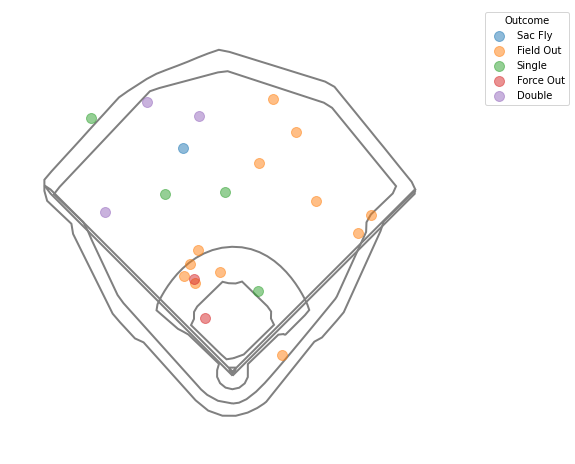

<Axes:>

In [61]:
pb.spraychart(pb.statcast_batter(start_dt='2022-09-01', end_dt='2022-09-08', player_id=571745), 'Mariners')